<img src="img/nasa_open_data.png">

<hr>
<h1 align=center> Analisys of NASA's Dataset on Meteorite Landings </h1><br>
<div align=left> <a href="https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh">NASA's Open Data Portal - Meteorite Landings</a> </div>
<br>
<b> Data Analisys Fundamentals - Course's Project </b>
<br>
<i> Salvatore Campisi, W82000209 </i>
<br>
<i> AY 2018/2019 </i>

<hr>
<b>1. Overview:</b><br>
<a href="https://en.wikipedia.org/wiki/Meteorite">Meteorites</a> are bits of interplanetary material falling through Earth's atmosphere and heated to incandescence by friction.<br>
Most meteorites (but not all) burns up in the atmosphere before even reaching the ground, but some meteorite's dust is captured by high-altitude aircraft and analyzed in NASA's laboratories.

<b>2. Dataset Information: </b>
<br>
This dataset is mantained by <a href="https://www.nasa.gov">NASA</a> in collaboration with <a href="https://meteoritical.org">The Meteoritical Society</a> and contains data on all of the known 45 716 meteorites that have struck our planet.<br>


This dataset contains the following variables:

<table align=left>
    <tr>
        <td><font size=3><b>name </b></font> :<td> 
        <td><font size=2><p>the name that NASA and Meteoritical Society assigned to the meteorite.</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>id</b></font> :<td> 
        <td><font size=2><p>a unique identifier for the meteorite.</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>nametype</b></font> :<td> 
        <td><font size=2><p> variable which describes the
            degradation of the meteorite caused by weather on Earth.<br><br>
            <i>-- Valid :</i> a meteorite not highly degraded.<br>
            <i>-- Relict :</i> a meteorite too much degraded.
            </p></font></td>
    </tr>
    <tr>
        <td><font size=3><b>recclass</b></font> :<td> 
        <td><font size=2><p>the class of the meteorite,
            based on physical, chemical, and other meteorite's characteristics.</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>mass</b></font> :<td> 
        <td><font size=2><p>the mass of the meteorite in grams.</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>fall</b></font> :<td> 
        <td><font size=2><p>variable which describes if the meteorite was seen falling,
            or was discovered after its impact.<br><br>
            <i>-- Fell :</i> the meteorite's fall was observed.<br>
            <i>-- Found :</i> the meteorite's fall was not observed.
            </p></font></td>
    </tr>
    <tr>
        <td><font size=3><b>year</b></font> :<td> 
        <td><font size=2><p>the year the meteorite fell or was found
            (depending on the value of fall).</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>reclat</b></font> :<td> 
        <td><font size=2><p>the latitude of the meteorite's landing.</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>reclon</b></font> :<td> 
        <td><font size=2><p>the longitude of the meteorite's landing.</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>GeoLocation</b></font> :<td> 
        <td><font size=2><p>comma-separated tuple (parentheses-enclose) which combines reclat and reclong.</p></font></td>
    </tr> 
</table>

<b><i> Note that a few column names start with "rec". These are the recommended values of these variables, according to NASA and The Meteoritical Society. </i></b>

<b> 3. Analysis Goals: </b><br>
<ul>
<li>Use the values of latitude and longitude for each meteorite to estimate the differences between the two following geographical distributions:<br>
(1) Meteorites whose fall has been observed,<br>
(2) Meteorites found after the impact with Earth.<br>
<br>
This analysis could answer concretely to the following questions:<br>
• Which is the geographic area where it's more likely to see a meteorite falling?<br>
• Where would it be more strategic to build observation bases for meteorite research in the near future?<br>
• Which are the geographic areas where it's more likely to find a meteorite not yet discovered? Where is more convenient to look for?<br>
<br>
<li>Use the data in order to answer the following questions:<br> 
• There is a correlation between a certain geographic area and the class of the meteorites found in that area?<br>
• There is a correlation between a certain time window and the class of the meteorites observed falling?<br>
• In general, are there significant correlations between variables?<br>
&nbsp;&nbsp;Is it possible obtain helpful informations to refine the answers to the questions asked in the previous points?
<hr>

In [1]:
import numpy  as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cfeature
from scipy.stats import chi2_contingency

# For not showing Warnings in the Notebook:
import warnings
warnings.filterwarnings('ignore')

from cnt import countries
from rpl import others_list, h_list, l_list, ll_list

In [2]:
# Loading CSV Dataset in a Pandas Dataframe:
#Note that there is a copy is located on personal server to avoid too many access to NASA's portal).  
#nasa_dataset_url = "http://salvocampisi.com/datasets/nasa_meteorite_landings.csv"

nasa_dataset_pathname = "./data/nasa_meteorite_landings.csv"
nasa_df = pd.read_csv(nasa_dataset_pathname)

In [3]:
# Dataframe Info:
nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
name           45716 non-null object
id             45716 non-null int64
nametype       45716 non-null object
recclass       45716 non-null object
mass           45585 non-null float64
fall           45716 non-null object
year           45428 non-null float64
reclat         38401 non-null float64
reclong        38401 non-null float64
GeoLocation    38401 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [4]:
# Dataframe first 5 rows:
nasa_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [5]:
# Data Manipulation:

# Removing the rows that have NaN values in any columns: 
nasa_df.dropna(inplace=True)

# Removing the columns "GeoLocation" because it is redundant:
nasa_df = nasa_df.drop(columns=["GeoLocation"])

# Removing the rows that have Not Valid "latitude" and "longitude" values:
nasa_df = nasa_df[(nasa_df["reclat"] != 0.0) & (nasa_df["reclong"] != 0.0)]

In [6]:
# Manipulated Dataset:
nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31706 entries, 0 to 45715
Data columns (total 9 columns):
name        31706 non-null object
id          31706 non-null int64
nametype    31706 non-null object
recclass    31706 non-null object
mass        31706 non-null float64
fall        31706 non-null object
year        31706 non-null float64
reclat      31706 non-null float64
reclong     31706 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.4+ MB


In [7]:
# Creating views for better analysis:
nasa_df  = nasa_df[(nasa_df["nametype"] == "Valid")]   # Meteorites in good conditions for being studied
nasa_df_fell   = nasa_df[(nasa_df["fall"] == "Fell")]  # Meteorites observed falling
nasa_df_found  = nasa_df[(nasa_df["fall"] == "Found")] # Meteorites found after their fall

In [8]:
# GEOGRAPHICAL ANALYSIS:
# Creating coordinates boxes for Geographical Data Visualization:
# Semantics: box_AREA = [West_coordinate, East_coordinate, North_coordinate, South_coordinate]

# Earth:
box_globe = [-180, 180, 90, -90]
# Continents:
box_america = [-175, -27, 75, -25]
box_africa = [-25, 60, 30, -28]
box_europe = [-27, 60, 65, 30]
box_asia = [35, 150, 80, 1]
box_oceania = [85, 180, 20, -50]
box_antartica = [-180, 180, -25, -90]

# America's specific areas:
box_north_america = [-170, -40, 75, 5]
box_south_america = [-108, -28, 15, -50]
box_usa = [-130, -60, 45, 25]

# Asia's specific areas:
box_arabia = [31, 60, 37, 12]
box_oman = [51, 61, 24, 16]

# Antartica's specific areas:
# box_zucchelli = [135, 179, -65, -89]

In [9]:
# GEOGRAPHICAL ANALYSIS: Data Visualization
# Creating a function that allows to plot (longitude, latitude) points on a geographical map:

# Function Parameters:
# _title = geographical map title
# _description = geographical map description
# _marker = markers type
# _color = markers color
# _alpha = markers alpha
# _globe_area = globe area box coordinates to zoom in
# _series_long = longitude of points to plot
# _series_lat = latitude of points to plot

def show_geo_points(_title, _description, _marker, _color, _alpha, _globe_area, _series_long, _series_lat):
    # Graphic parameters:
    local_title = _title
    local_title_size = 16
    local_width = 20
    local_height = 20
    local_points_color = _color
    local_points_alpha = _alpha
    local_marker = _marker
    local_description = _description
    local_graphic_coordinates = _globe_area
        
    # Setting up the coordinates:
    west_long = local_graphic_coordinates[0]
    east_long = local_graphic_coordinates[1]
    north_lat = local_graphic_coordinates[2]
    south_lat = local_graphic_coordinates[3]
    
    # Setting up the graphic:
    plt.figure(figsize=(local_width, local_height))
    
    geo_axes = plt.axes(projection=ccrs.PlateCarree())
    
    geo_axes.set_extent([west_long, east_long, north_lat, south_lat])
    
    geo_axes.add_feature(cfeature.COASTLINE, edgecolor="#7e7e7e")
    geo_axes.add_feature(cfeature.LAND)
    geo_axes.add_feature(cfeature.BORDERS, edgecolor="#d7d7d7")
    geo_axes.add_feature(cfeature.OCEAN)
    geo_axes.add_feature(cfeature.LAKES)
    geo_axes.add_feature(cfeature.RIVERS)
    
    # Plotting the data:
    plt.scatter(_series_long, _series_lat, marker=local_marker, c=local_points_color, alpha=local_points_alpha)
    plt.title(local_title, fontsize=local_title_size)
    plt.show()
    if local_description != "":
        print("• Description: ", local_description)

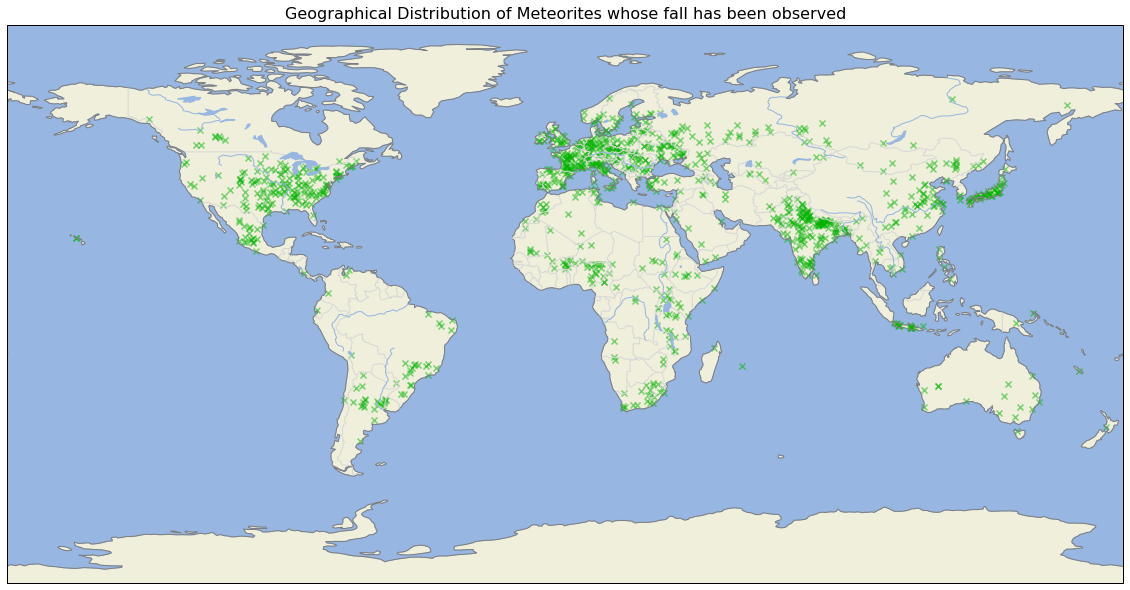

• Description:  Meteorites seen falling around all the globe.


In [10]:
# GEOGRAPHICAL ANALYSIS:
# Geographical Distribution of Meteorites whose fall has been observed.

title = "Geographical Distribution of Meteorites whose fall has been observed"
description = "Meteorites seen falling around all the globe."

show_geo_points(title, description, "x", "#00B300", 0.50, box_globe, nasa_df_fell["reclong"], nasa_df_fell["reclat"])

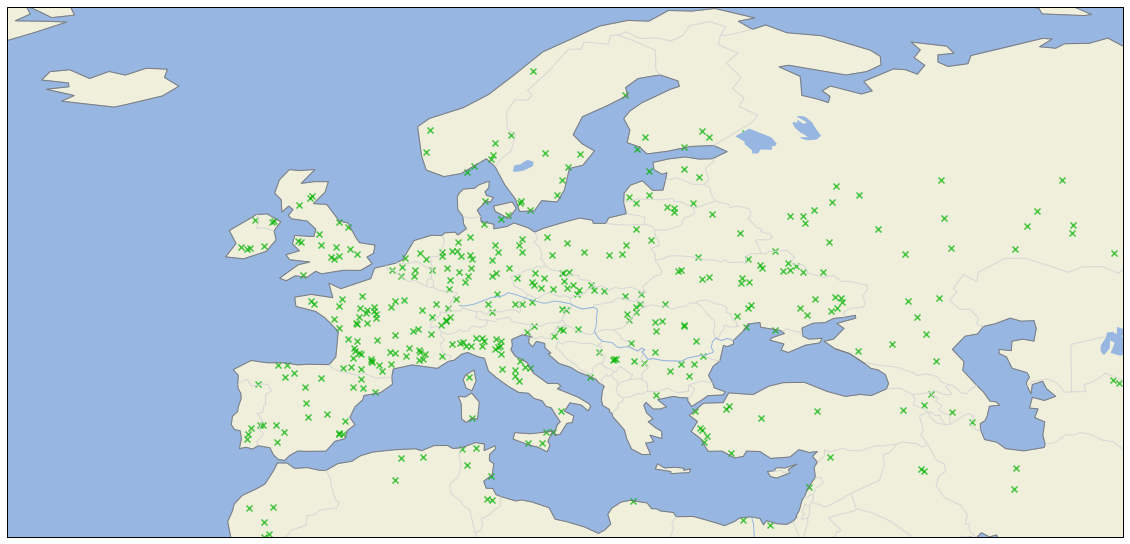

• Description:  Meteorites seen falling in Europe.


In [11]:
description = "Meteorites seen falling in Europe."

show_geo_points("", description, "x", "#00B300", 0.70, box_europe, nasa_df_fell["reclong"], nasa_df_fell["reclat"])

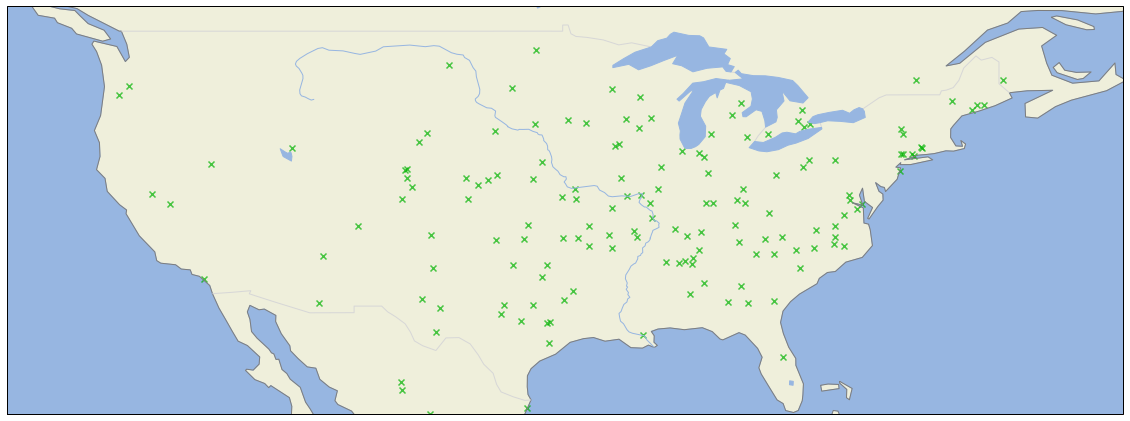

• Description:  Meteorites seen falling in USA.


In [12]:
description = "Meteorites seen falling in USA."

show_geo_points("", description, "x", "#00B300", 0.70, box_usa, nasa_df_fell["reclong"], nasa_df_fell["reclat"])

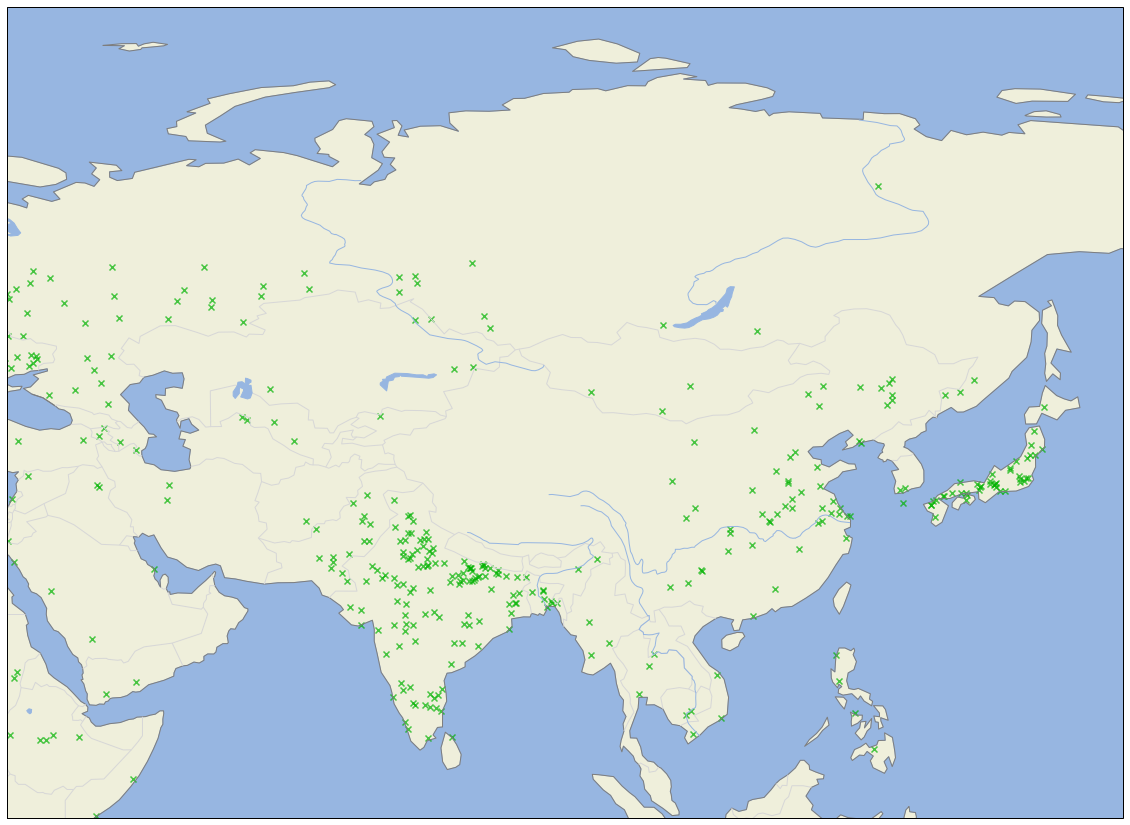

• Description:  Meteorites seen falling in Asia.


In [13]:
description = "Meteorites seen falling in Asia."

show_geo_points("", description, "x", "#00B300", 0.70, box_asia, nasa_df_fell["reclong"], nasa_df_fell["reclat"])

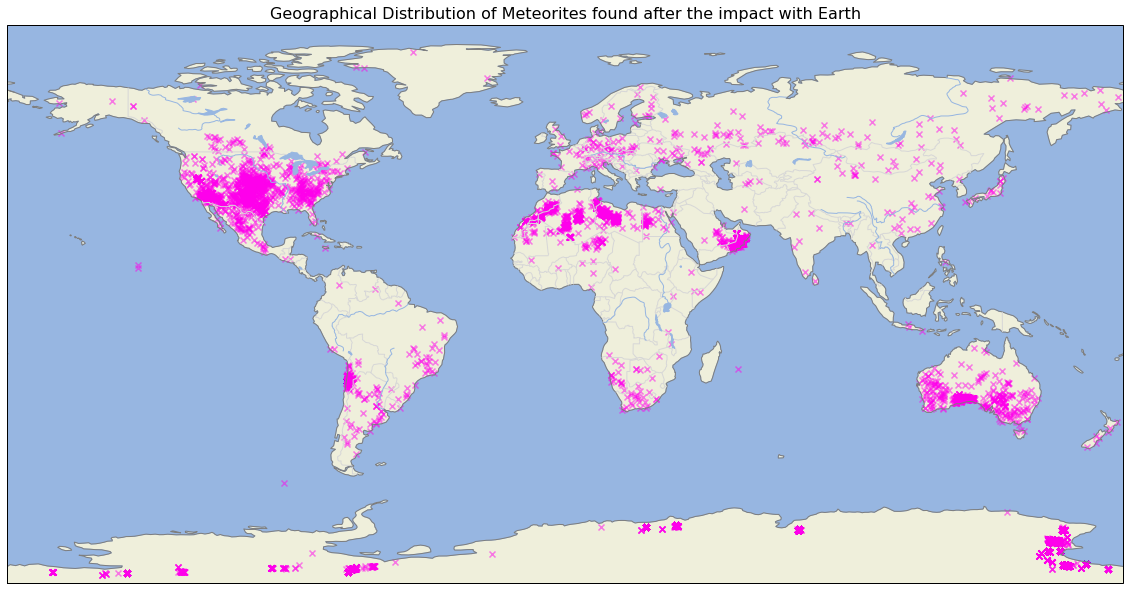

• Description:  Meteorites found around all the globe.


In [14]:
# GEOGRAPHICAL ANALYSIS: Data Visualization
# Geographical Distribution of Meteorites found after the impact with Earth.

title = "Geographical Distribution of Meteorites found after the impact with Earth"
description = "Meteorites found around all the globe."

show_geo_points(title, description, "x", "#FF00EC", 0.50, box_globe, nasa_df_found["reclong"], nasa_df_found["reclat"])

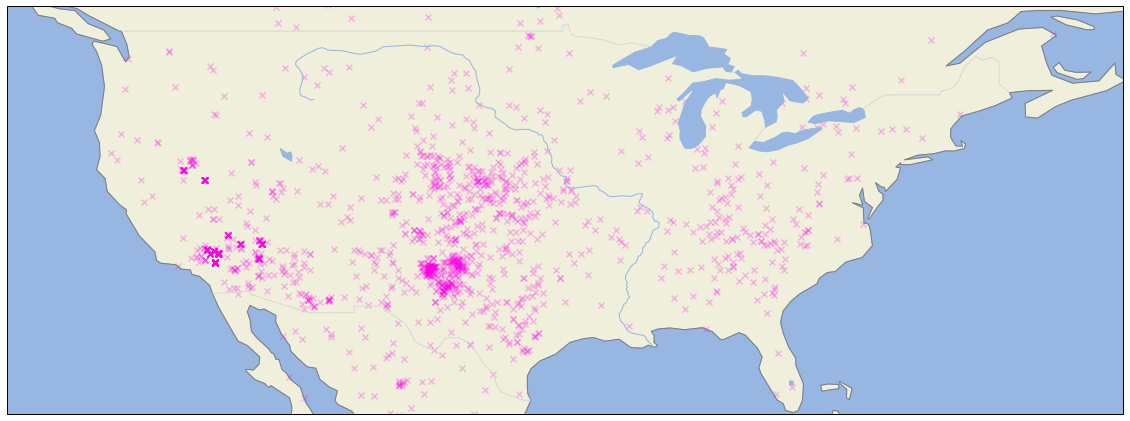

• Description:  Meteorites found in USA.


In [15]:
description = "Meteorites found in USA."

show_geo_points("", description, "x", "#FF00EC", 0.25, box_usa, nasa_df_found["reclong"], nasa_df_found["reclat"])

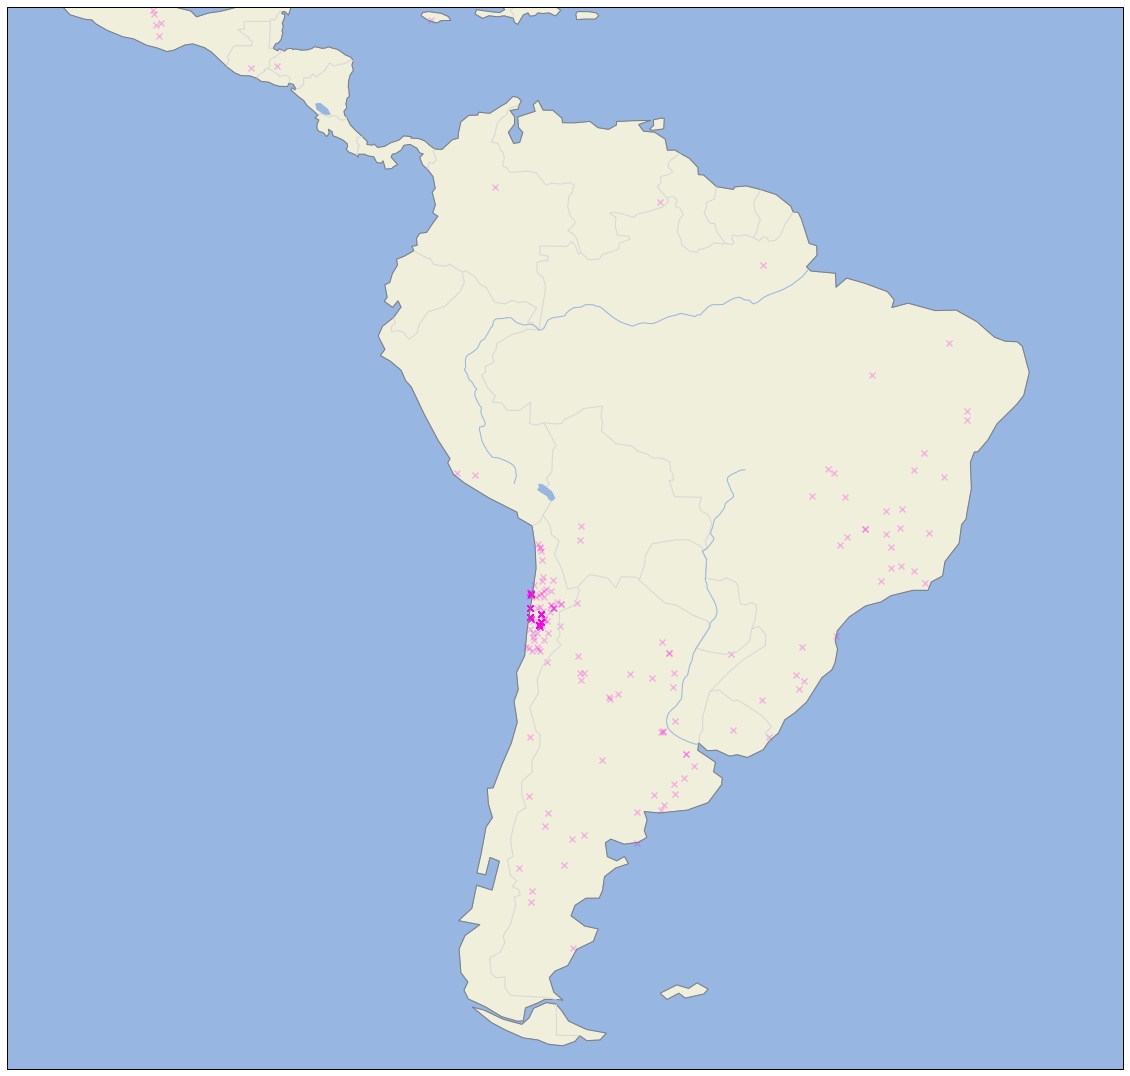

• Description:  Meteorites found in South America.


In [16]:
description = "Meteorites found in South America."

show_geo_points("", description, "x", "#FF00EC", 0.25, box_south_america, nasa_df_found["reclong"], nasa_df_found["reclat"])

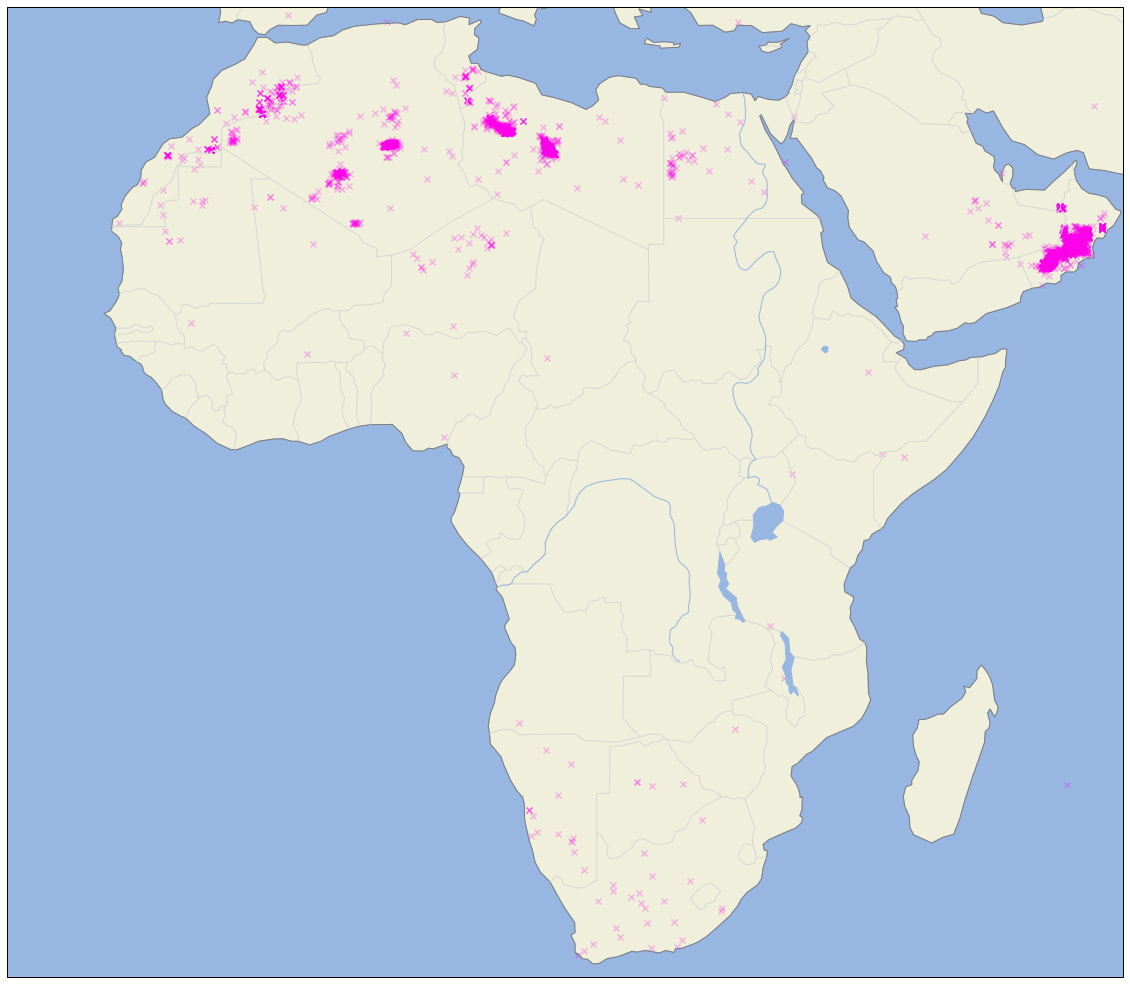

• Description:  Meteorites found in Africa.


In [17]:
description = "Meteorites found in Africa."

show_geo_points("", description, "x", "#FF00EC", 0.25, box_africa, nasa_df_found["reclong"], nasa_df_found["reclat"])

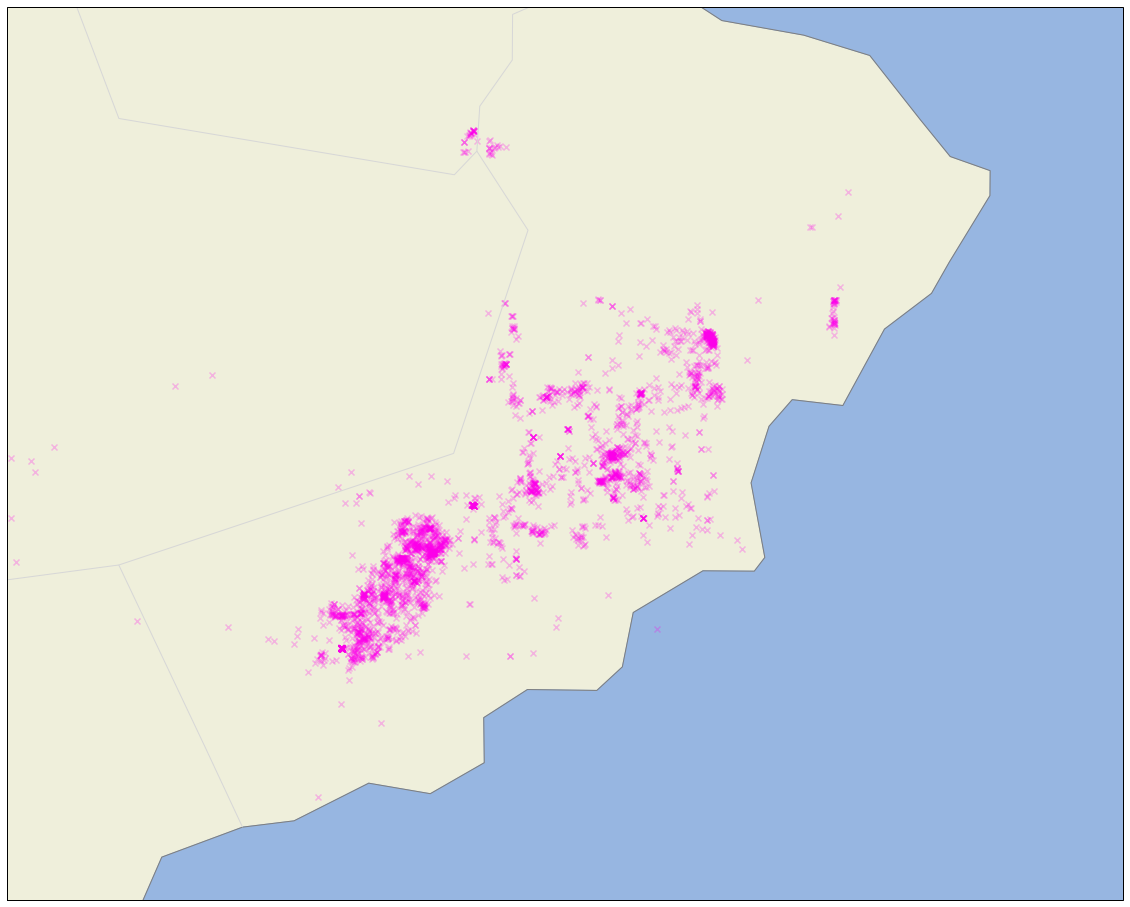

• Description:  Meteorites found in Oman (a country on the Arabian Peninsula).


In [18]:
description = "Meteorites found in Oman (a country on the Arabian Peninsula)."

show_geo_points("", description, "x", "#FF00EC", 0.25, box_oman, nasa_df_found["reclong"], nasa_df_found["reclat"])

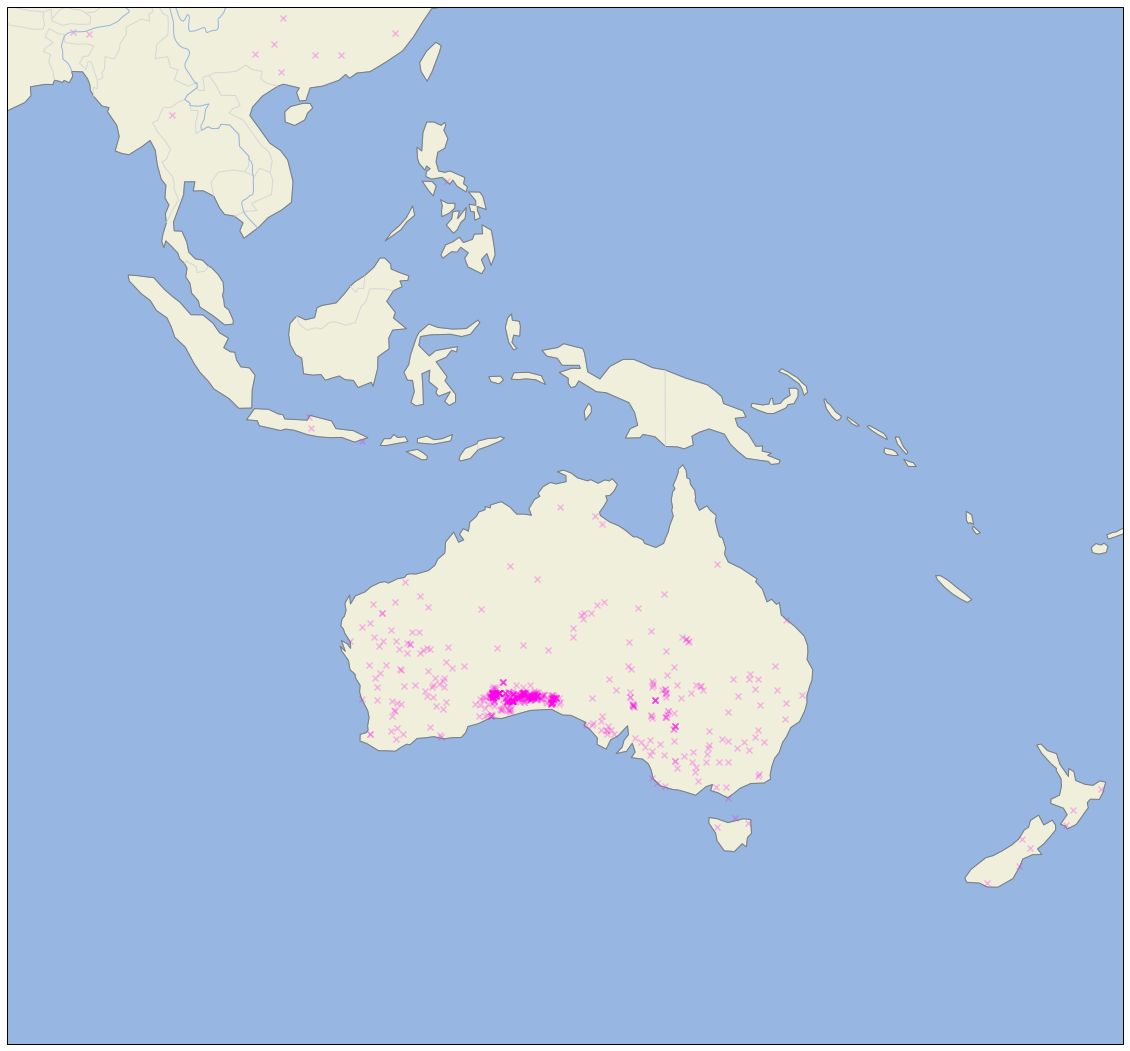

• Description:  Meteorites found in Oceania.


In [19]:
description = "Meteorites found in Oceania."

show_geo_points("", description, "x", "#FF00EC", 0.25, box_oceania, nasa_df_found["reclong"], nasa_df_found["reclat"])

In [20]:
# GEOGRAPHICAL ANALYSIS:

# THE PREVIOUS DATA VISUALIZATION NEED TO BE QUANTIFIED WITH MORE PRECISION.

# Dictionary which contains the coordinates for each country in the World: cnt.py

countries_dict = {}

for x,y in countries.values():
    temp_coordinates = [0,0,0,0]
    
    temp_coordinates[0] = y[0]
    temp_coordinates[1] = y[2]
    temp_coordinates[2] = y[3]
    temp_coordinates[3] = y[1]
    
    countries_dict[x] = temp_coordinates
    
# countries_dict will be now a dictionary with this structure:
# "Country_Name" : list_of_coordinates_[West, East, North, South]

In [21]:
# Creating a function that return the numbers of points inside a given box of coordinates.

# Function Parameters:
# temp_df = a subset of Nasa Meteorite Landings (or all the dataset).
# temp_crd = a list of coordinates which define a box of cordinates.

def check_country(temp_df, temp_crd):    
    min_long = temp_crd[0]
    max_long = temp_crd[1]
    max_lat  = temp_crd[2]
    min_lat  = temp_crd[3]
    
    sup_df = temp_df[(temp_df["reclong"] >= min_long) & (temp_df["reclong"] <= max_long) & (temp_df["reclat"] >= min_lat) & (temp_df["reclat"] <= max_lat)]
    
    return sup_df["id"].count()

In [22]:
fell_meteorites_dict = {}
found_meteorites_dict = {}

for x in countries_dict:
    fell_meteorites_dict[x] = check_country(nasa_df_fell, countries_dict[x])
    found_meteorites_dict[x] = check_country(nasa_df_found, countries_dict[x])

fell_series = pd.Series(fell_meteorites_dict).sort_values(ascending=False)
found_series = pd.Series(found_meteorites_dict).sort_values(ascending=False)

In [23]:
# Quantifying the number of Meteorite whose fall has been observed:

print("Meteorite whose fall has been observed:")
print(fell_series[:25])

Meteorite whose fall has been observed:
Russia            413
China             192
United States     180
India             149
France             89
Canada             47
Pakistan           44
Japan              44
Germany            43
Italy              42
Ukraine            42
Brazil             42
Spain              34
Mexico             34
Argentina          23
Poland             23
South Africa       21
Norway             21
Nigeria            20
Algeria            19
United Kingdom     19
Kazakhstan         19
Romania            18
Niger              17
Mali               17
dtype: int64


In [24]:
# Quantifying the number of Meteorites found after the impact with Earth:

print("Meteorites found after the impact with Earth:")
print(found_series[:25])

Meteorites found after the impact with Earth:
Antartica               22094
Oman                     3026
Saudi Arabia             1818
United States            1617
Libya                    1512
Algeria                   889
Australia                 618
Brazil                    462
Argentina                 443
Chile                     416
Russia                    381
Morocco                   260
Mexico                    216
Canada                    139
Mauritania                 71
China                      66
Mali                       53
Niger                      47
United Arab Emirates       45
Egypt                      44
Tunisia                    43
Kazakhstan                 31
South Africa               30
Germany                    23
France                     22
dtype: int64


<hr>
<h5> Conclusion of Geographical Analysis: </h5><br>
Seen falling meteorites seem to correlate with densely populated area by humans, while meteorites are found in more desertic areas.<br>
This statement makes sense, because finding a meteorite is obviously more difficult in inner cities, but it's easier in desertic areas (you may not want destroy buildings for searching meteorites).<br>
<br>
Russia, followed by China, United States and India are the countries where it's more likely to see a meteorite falling.<br>
However the GEOGRAPHIC AREA where it's more likely to see a meteorite falling is Europe.<br>
<u>It would be great to build an observation bases for meteorite research in the center of Europe.</u><br>
<br>
Antartica, Oman, Saudi Arabia, United States and several countries in North of Africa/South America are the geographic areas where it's more likely to find a meteorite not yet discovered.<br>
<u>Is convenient to look for other meteorites starting from this geographic areas and carrying on, following the "oil stain" method.</u>
<hr>


 Classes of Meteorites in Nasa's Dataset on Meteorite Landings:
H        13537
L        11085
LL        3539
Other     3524
Name: recclass, dtype: int64


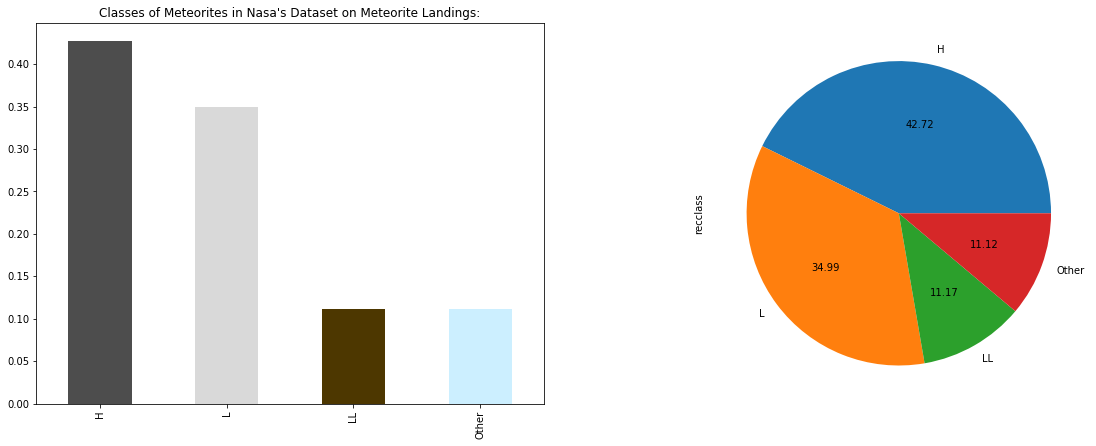

In [25]:
# CORRELATION ANALYSIS:

# Studying the classes of meteorites (https://en.wikipedia.org/wiki/Meteorite_classification) you learn that they
# are grouped together in main different families.

# Grouping meteroites by family:
nasa_df2 = nasa_df.drop("nametype", axis=1)
nasa_df2["year"] = nasa_df2["year"].astype(int)

nasa_df2["recclass"].replace(to_replace=h_list, value="H", inplace=True)
nasa_df2["recclass"].replace(to_replace=l_list, value="L", inplace=True)
nasa_df2["recclass"].replace(to_replace=ll_list, value="LL", inplace=True)
nasa_df2["recclass"].replace(to_replace=others_list, value="Other", inplace=True)

# H  = High Iron Meteorites
# L  = Low Iron Meteorites
# LL = Stony Meteorites
# Other = Meteorites that aren't H,L,LL

# Data Visualization: Classes of Meteorites
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
_colors = ["#4d4d4d","#d9d9d9","#4d3700","#ccefff"]
_title = "Classes of Meteorites in Nasa's Dataset on Meteorite Landings:"
nasa_df2["recclass"].value_counts(normalize=True).sort_index().plot.bar(title=_title, color=_colors)

plt.subplot(1,2,2)
nasa_df2["recclass"].value_counts().plot.pie(autopct='%.2f')

print("\n",_title)
print(nasa_df2["recclass"].value_counts())

In [26]:
# NOTE:
# countries_dict is a dictionary with the following structure:
# Country_Name : list_of_coordinates_[West, East, North, South]

# Data Manipulation: adding the column "country" for a better studying of the correlation between
# the country where the meteorite has been found/fall and its class family.
nasa_df2["country"] = "NULL"
nasa_df2.set_index("id", inplace=True)

In [27]:
for k in nasa_df["id"].unique():
    temp_long = nasa_df2.at[k, "reclong"]
    temp_lat = nasa_df2.at[k, "reclat"]
    
    for country,coordinates in countries_dict.items():        
        min_long = coordinates[0]
        max_long = coordinates[1]
        max_lat  = coordinates[2]
        min_lat  = coordinates[3]
        if(temp_long <= max_long and temp_long >= min_long and temp_lat <= max_lat and temp_lat >= min_lat):
            nasa_df2.at[k,"country"] = country

nasa_df2.head()

,name,recclass,mass,fall,year,reclat,reclong,country
id,,,,,,,,
1,Aachen,L,21.0,Fell,1880,50.77500,6.08333,Russia
2,Aarhus,H,720.0,Fell,1951,56.18333,10.23333,Russia
6,Abee,Other,107000.0,Fell,1952,54.21667,-113.00000,United States
10,Acapulco,Other,1914.0,Fell,1976,16.88333,-99.90000,Mexico
370,Achiras,L,780.0,Fell,1902,-33.16667,-64.95000,Brazil


In [28]:
# Figuring out if there is a bond between a certain geographic area and the class of the meteorites
# found in that area.
country_crosstab = pd.crosstab(nasa_df2["country"], [nasa_df2["recclass"]])

country_crosstab.head()

# Visualizing all the crosstab:
#print(data_crosstab.to_string())

recclass,H,L,LL,Other
country,,,,
Algeria,261,179,48,51
Antartica,9412,7899,3033,1750
Argentina,7,5,0,4
Australia,226,226,36,145
Azerbaijan,0,0,0,1


In [29]:
# Chi-Squared Test between "country" and "recclass":

vals = chi2_contingency(country_crosstab)

print("Chi-Squared Test for categorical data:")
print("Statistics:         ", vals[0])
print("P-Value:            ", vals[1])
print("Degrees of freedom: ", vals[2])

print("\nWe can say that 'country' and 'recclass' are not independent.")
print("The country in which a meteorite is found, affects the value of its class.")

Chi-Squared Test for categorical data:
Statistics:          2605.0020563921225
P-Value:             0.0
Degrees of freedom:  231

We can say that 'country' and 'recclass' are not independent.
The country in which a meteorite is found, affects the value of its class.


In [30]:
# Figuring out if there is a bond between a certain time window and the class of the meteorites
# seen falling in that time window.

fell_h_df = nasa_df2[(nasa_df2["fall"] == "Fell") & (nasa_df2["recclass"] == "H")]
fell_l_df = nasa_df2[(nasa_df2["fall"] == "Fell") & (nasa_df2["recclass"] == "L")]
fell_ll_df = nasa_df2[(nasa_df2["fall"] == "Fell") & (nasa_df2["recclass"] == "LL")]
fell_o_df = nasa_df2[(nasa_df2["fall"] == "Fell") & (nasa_df2["recclass"] == "Other")]

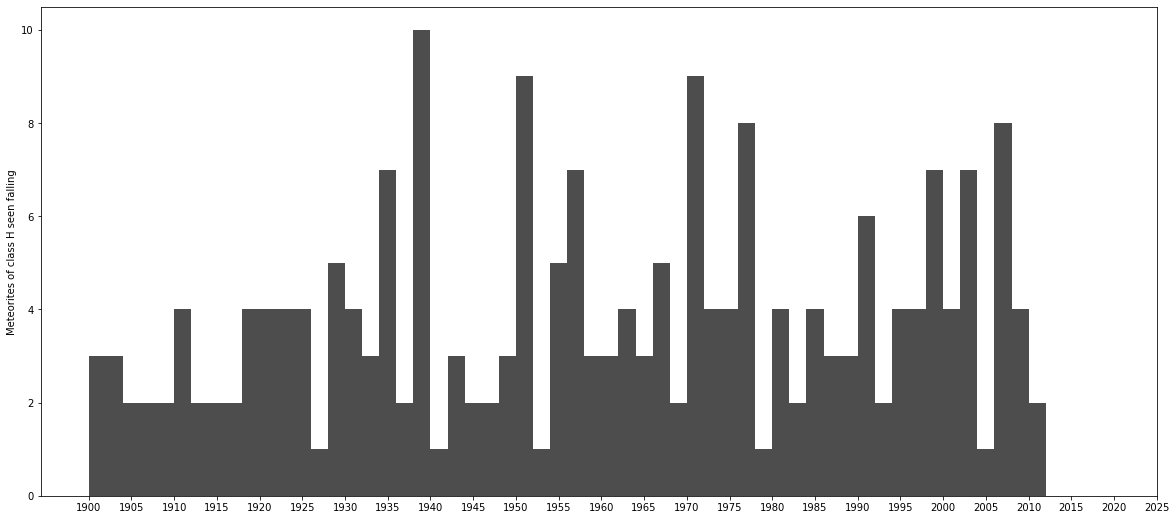

In [31]:
# Plotting the fallen meteorites of class H as a function of time:

n_bins = np.arange(1900,2014,2)
n_ticks = np.arange(1900,2030,5)

plt.figure(figsize=(20,9))

h_time = plt.hist(fell_h_df["year"], bins = n_bins, histtype='stepfilled', color="#4d4d4d")
h_time = plt.ylabel("Meteorites of class H seen falling")
h_time = plt.xticks(n_ticks)

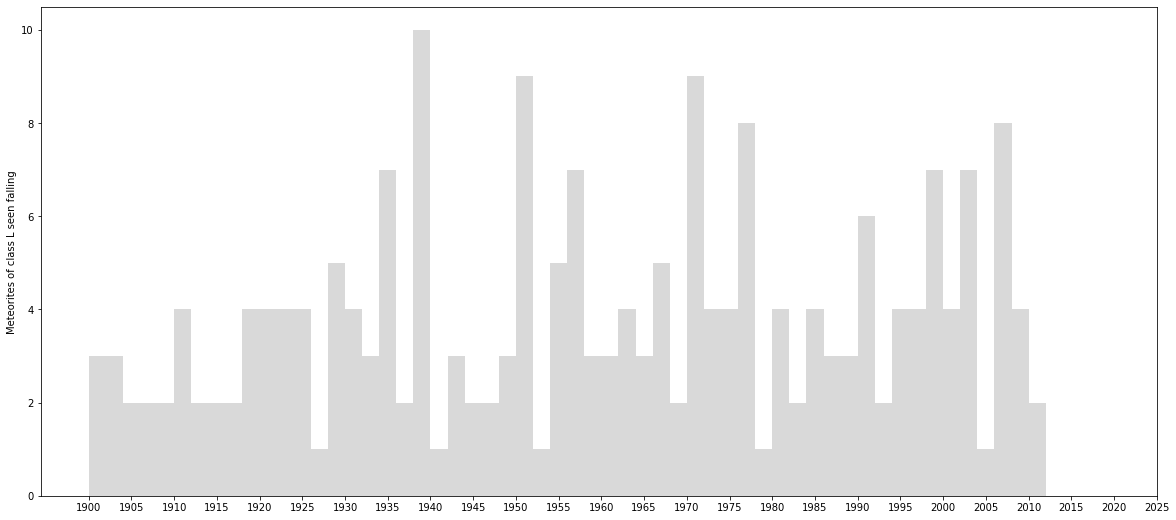

In [32]:
# Plotting the fallen meteorites of class L as a function of time:

plt.figure(figsize=(20,9))

l_time = plt.hist(fell_h_df["year"], bins = n_bins, histtype='stepfilled', color="#d9d9d9")
l_time = plt.ylabel("Meteorites of class L seen falling")
l_time = plt.xticks(n_ticks)

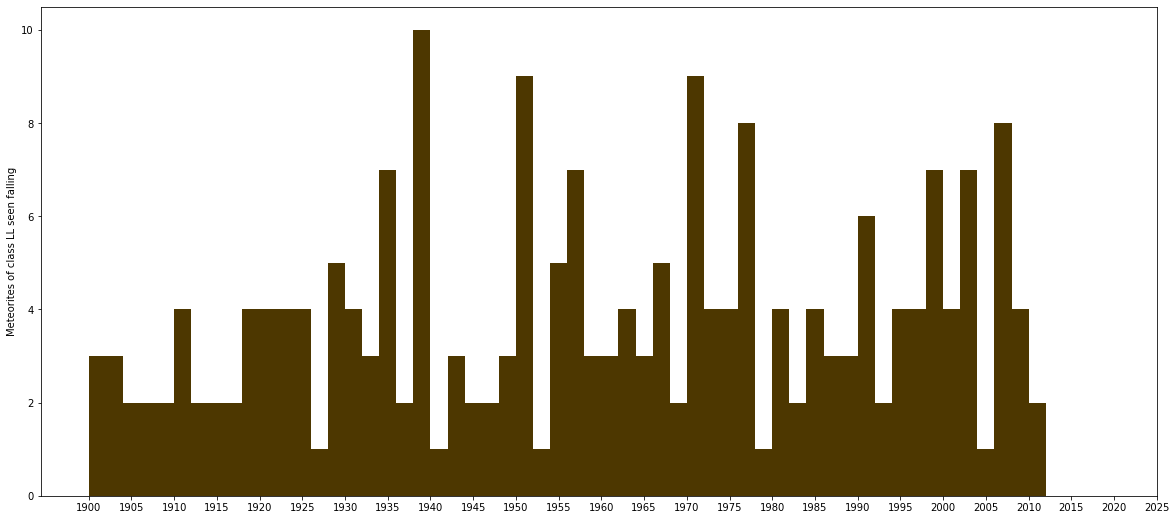

In [33]:
# Plotting the fallen meteorites of class LL as a function of time:

plt.figure(figsize=(20,9))

ll_time = plt.hist(fell_h_df["year"], bins = n_bins, histtype='stepfilled', color="#4d3700")
ll_time = plt.ylabel("Meteorites of class LL seen falling")
ll_time = plt.xticks(n_ticks)

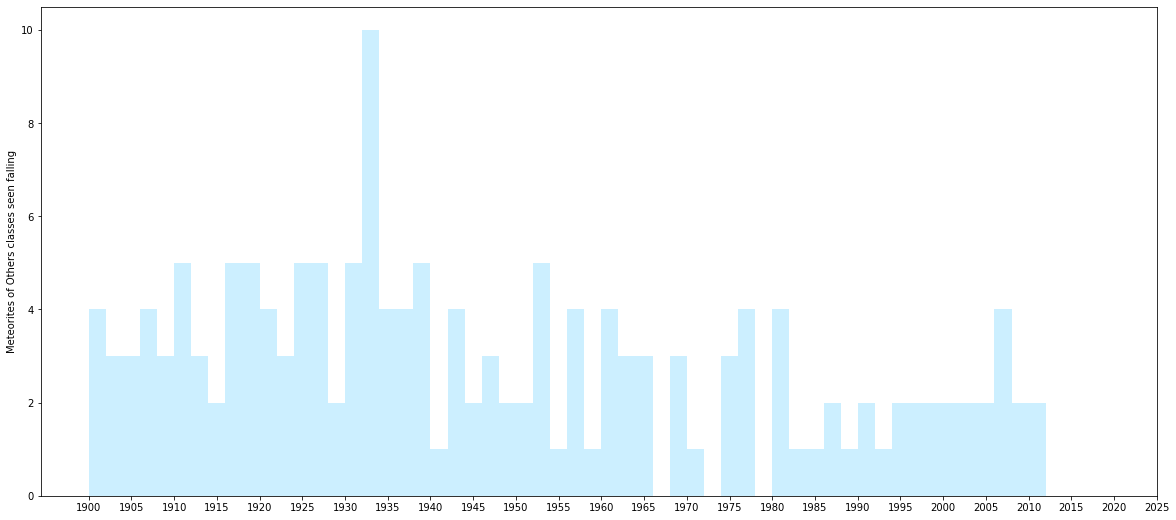

In [34]:
# Plotting the fallen meteorites of class O as a function of time:

plt.figure(figsize=(20,9))

o_time = plt.hist(fell_o_df["year"], bins = n_bins, histtype='stepfilled', color="#ccefff")
o_time = plt.ylabel("Meteorites of Others classes seen falling")
o_time = plt.xticks(n_ticks)

In [35]:
nasa_df_fell = nasa_df2[(nasa_df2["fall"] == "Fell")]

year_crosstab = pd.crosstab(nasa_df_fell["year"], [nasa_df_fell["recclass"]])

year_crosstab.head()

recclass,H,L,LL,Other
year,,,,
860,0,1,0,0
1399,0,0,0,1
1490,0,0,0,1
1491,0,0,1,0
1583,0,0,0,1


In [36]:
# Chi-Squared Test between "year" and "recclass":

valsc = chi2_contingency(year_crosstab)

print("Chi-Squared Test for categorical data:")
print("Statistics:         ", vals[0])
print("P-Value:            ", vals[1])
print("Degrees of freedom: ", vals[2])

print("\nWe can say that 'year' and 'recclass' are independent.")
print("The year in which a meteorite was seen falling doesn't affects its class.")

Chi-Squared Test for categorical data:
Statistics:          2605.0020563921225
P-Value:             0.0
Degrees of freedom:  231

We can say that 'year' and 'recclass' are independent.
The year in which a meteorite was seen falling doesn't affects its class.
